In [2]:
# load in the dataset
import pandas as pd

In [4]:
titanic = pd.read_csv('titanic.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# randomly generate age records based on existing distribution of age
titanic.describe().Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
import numpy as np
age_fill = np.random.normal(loc=30, scale=15, size=891-714)
type(age_fill)

numpy.ndarray

In [20]:
age_fill[age_fill<0] *= -1

In [22]:
age_fill[age_fill<0]

array([], dtype=float64)

In [25]:
age_fill = age_fill.round()
age_fill

array([40., 30., 39., 22., 20., 41., 44., 57., 49., 18., 35., 43., 10.,
       16., 51., 39.,  6., 53., 17., 43., 39., 35., 21., 67., 48., 24.,
       30., 13., 22.,  9.,  8., 44., 13., 53., 35., 15., 33., 24., 27.,
       21., 29., 53., 37., 23., 19., 13., 40., 17., 27., 13., 25.,  8.,
       46., 52., 41.,  1., 17., 18., 27., 42., 36., 39.,  4., 37.,  8.,
       14., 29., 45.,  5., 18., 46., 42., 28., 31., 35., 53., 29., 45.,
       35., 19., 13.,  7.,  6., 30., 25.,  6., 22., 36., 19., 35., 44.,
       42., 30., 19., 21., 42., 34., 20., 48., 22., 34., 31.,  5., 32.,
       36., 19., 16., 47., 17., 51., 25., 26., 18., 28., 22., 27., 45.,
       28., 47., 34., 23.,  3., 45., 39.,  9., 32., 24., 23., 51., 50.,
       34., 19., 41., 60., 12., 27., 24., 34., 41., 45., 30., 48., 48.,
       19., 22., 33., 46., 48., 25., 11., 25., 18., 46., 58., 12., 30.,
       25., 24., 24., 26., 27., 24., 38., 20., 45., 29., 36., 23., 37.,
       36.,  9., 41., 65., 21., 30., 42., 43.])

In [29]:
titanic.loc[titanic.Age.isna(),'Age'] = age_fill

In [30]:
titanic.Age.isna().sum()

0

In [33]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
titanic.loc[titanic.Embarked.isna(), 'Embarked'] = 'S'

In [35]:
titanic.Embarked.isna().sum()

0

In [41]:
titanic.drop('Cabin', axis=1, inplace=True)

In [42]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,43.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [43]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [44]:
# Visualizing the data
# questions:
# 1. how many people survived?
# 2. what kind of people survived?
#    a. passenger class 
#    b. sex
#    c. embarked

In [45]:
import matplotlib.pyplot as plt

In [48]:
survivor_count = titanic.Survived.value_counts()
survivor_count

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived Passengers')

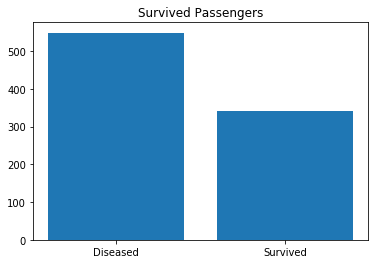

In [51]:
plt.bar(x=['Diseased', 'Survived'], height=survivor_count)
plt.title('Survived Passengers')

In [52]:
# what kind of people died and what kind of people survived?
import seaborn as sns

/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


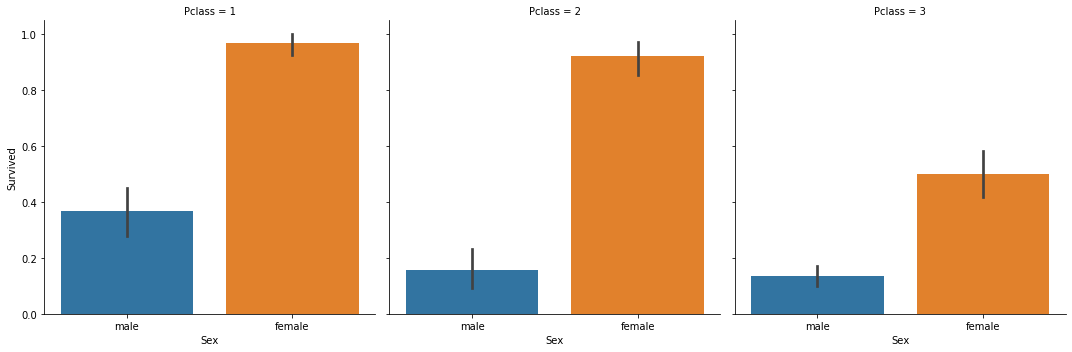

In [54]:
sns.catplot(x='Sex',y='Survived', data=titanic, kind='bar', col='Pclass')

In [55]:
# Preprocessing
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
# drop passenger id, name, ticket, 
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [57]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
sex_dummy = pd.get_dummies(titanic['Sex'], drop_first=True)
embarked_dummy = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [70]:
titanicdf = pd.concat([titanic, sex_dummy, embarked_dummy], axis=1)

In [72]:
titanicdf.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanicdf

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,43.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [73]:
X = titanicdf.drop('Survived', axis=1)

In [74]:
y = titanicdf['Survived']

In [75]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [76]:
y.name

'Survived'

In [77]:
titanicdf.shape

(891, 9)

In [82]:
import sklearn

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [86]:
X_train.shape

(445, 8)

In [88]:
# data modeling - decision tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# instantiate decision tree
decisionTree = DecisionTreeClassifier(random_state=1)
# fit model on training data
decisionTree.fit(X_train,y_train)
# make predictions
treePred = decisionTree.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [95]:
print('Accuracy Score:', accuracy_score(y_test, treePred))
print('ROC-AUC Score:', roc_auc_score(y_test, treePred))

Accuracy Score: 0.7511210762331838
ROC-AUC Score: 0.7299653015853228


In [97]:
# visualize the tree
from sklearn.tree import export_graphviz

export_graphviz(decisionTree, out_file='titanicTree.dot', filled=True, rounded=True, 
                feature_names=X.columns, class_names=['Diseased', 'Survived'])

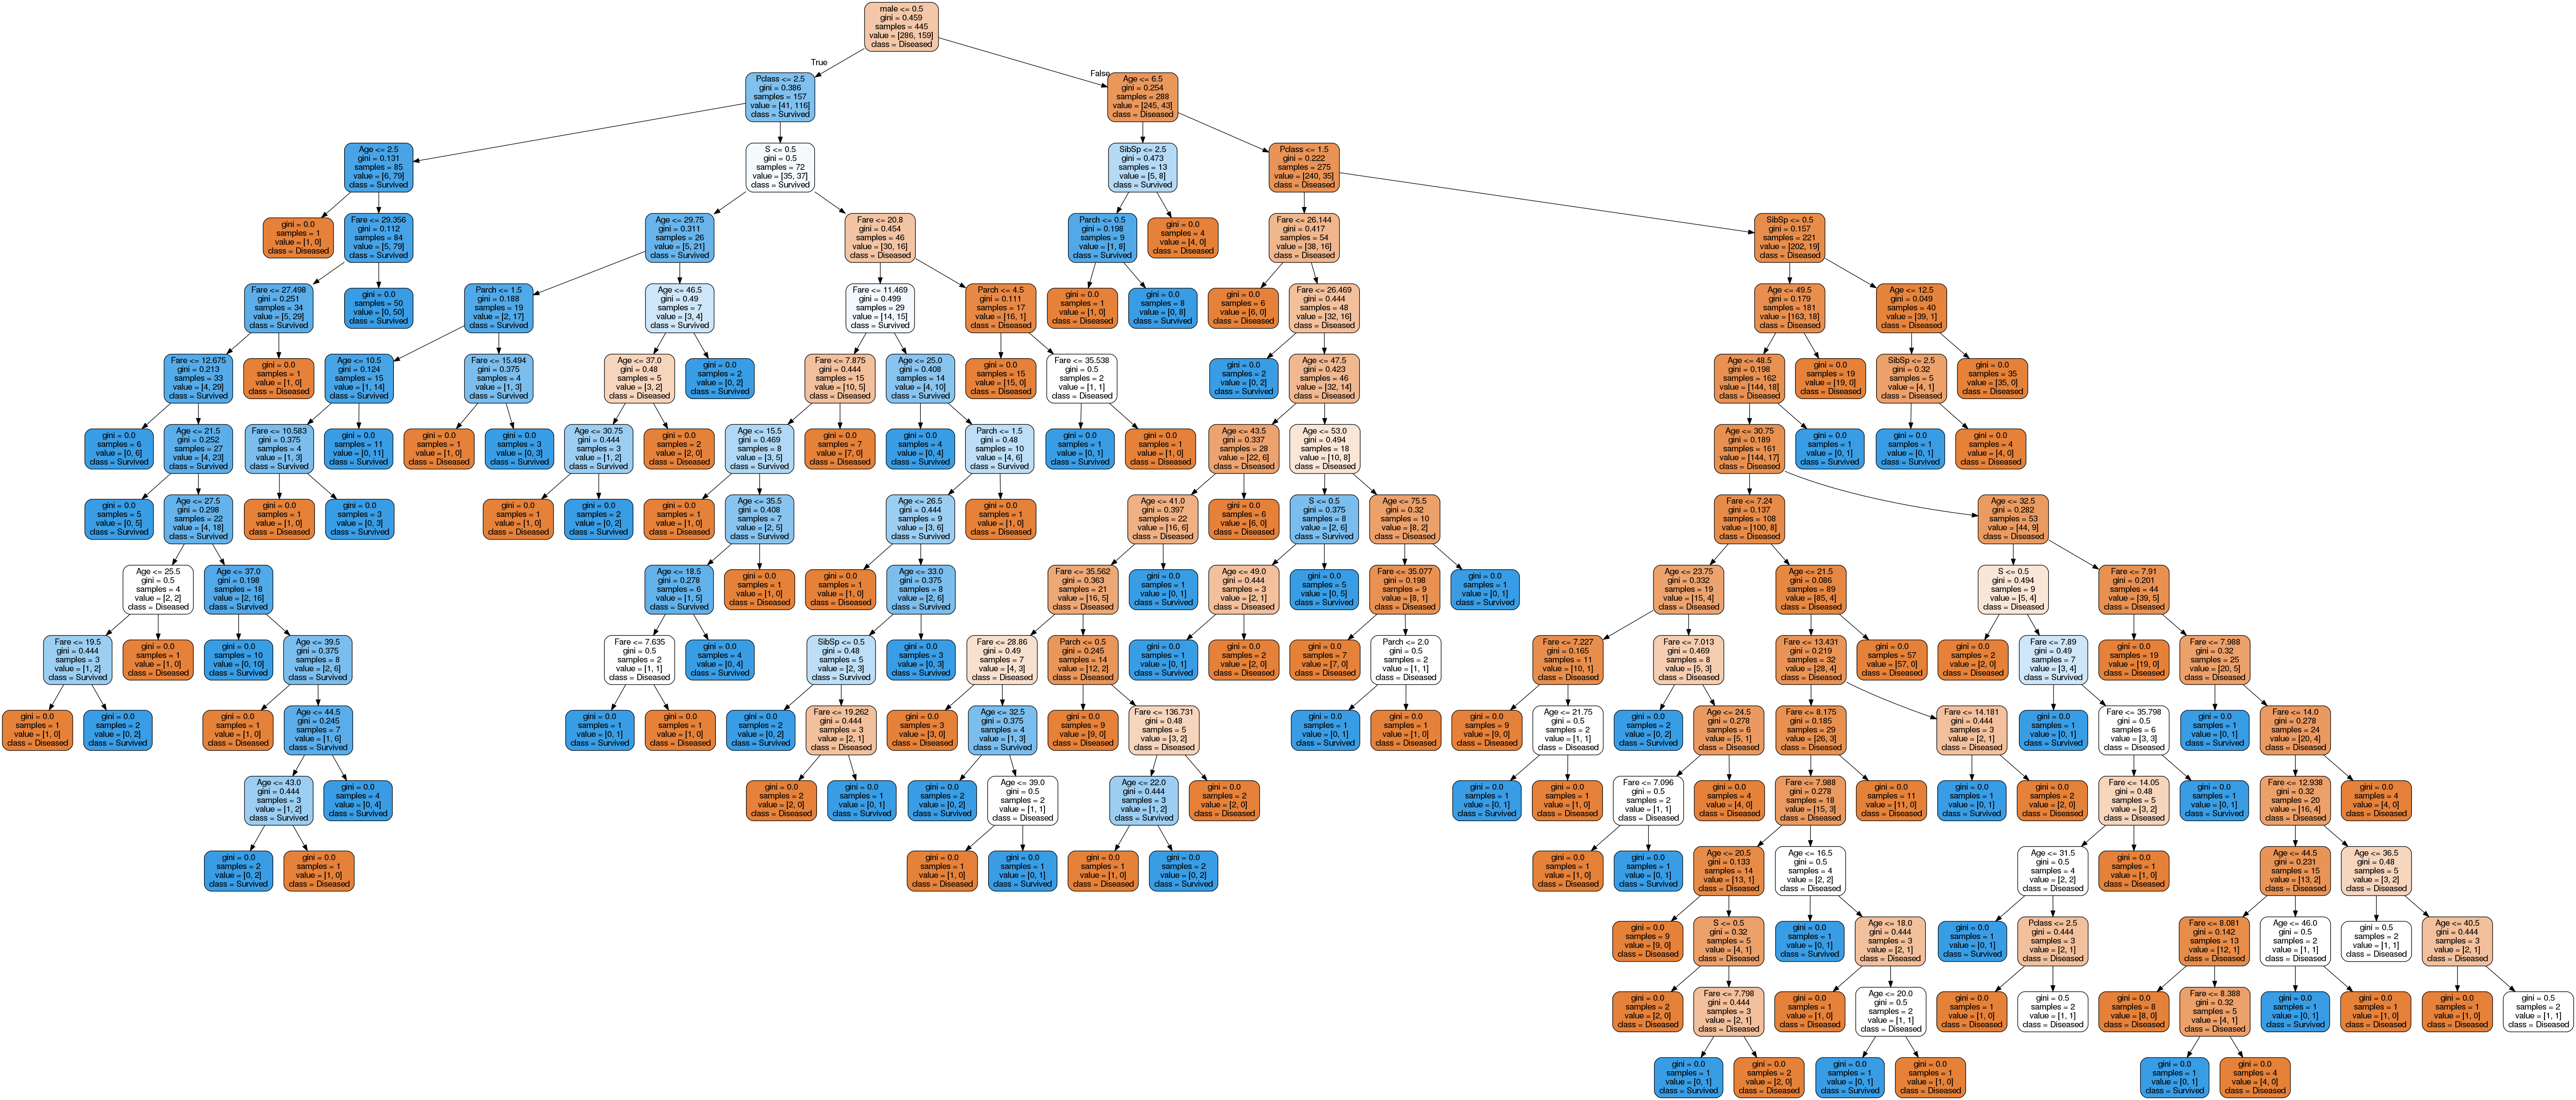

In [98]:
from IPython.display import Image
Image('titanicTree.png')

In [106]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(3,15)}
treeGrid = GridSearchCV(decisionTree, param_grid=params, cv=10, scoring='roc_auc')
treeGrid.fit(X_train, y_train)

print('Best Score:', treeGrid.best_score_)
print('Best Params:', treeGrid.best_params_)

Best Score: 0.8720088420877844
Best Params: {'criterion': 'entropy', 'max_depth': 4}


/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [107]:
# instantiate decision tree
decisionTree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=1)
# fit model on training data
decisionTree.fit(X_train,y_train)
# make predictions
treePred = decisionTree.predict(X_test)
# get the testing score
print('Accuracy Score:', accuracy_score(y_test, treePred))
print('ROC-AUC Score:', roc_auc_score(y_test, treePred))

Accuracy Score: 0.7959641255605381
ROC-AUC Score: 0.7638326165097965


In [108]:
# visualize the tree
from sklearn.tree import export_graphviz

export_graphviz(decisionTree, out_file='titanicTreePostCV.dot', filled=True, rounded=True, 
                feature_names=X.columns, class_names=['Diseased', 'Survived'])

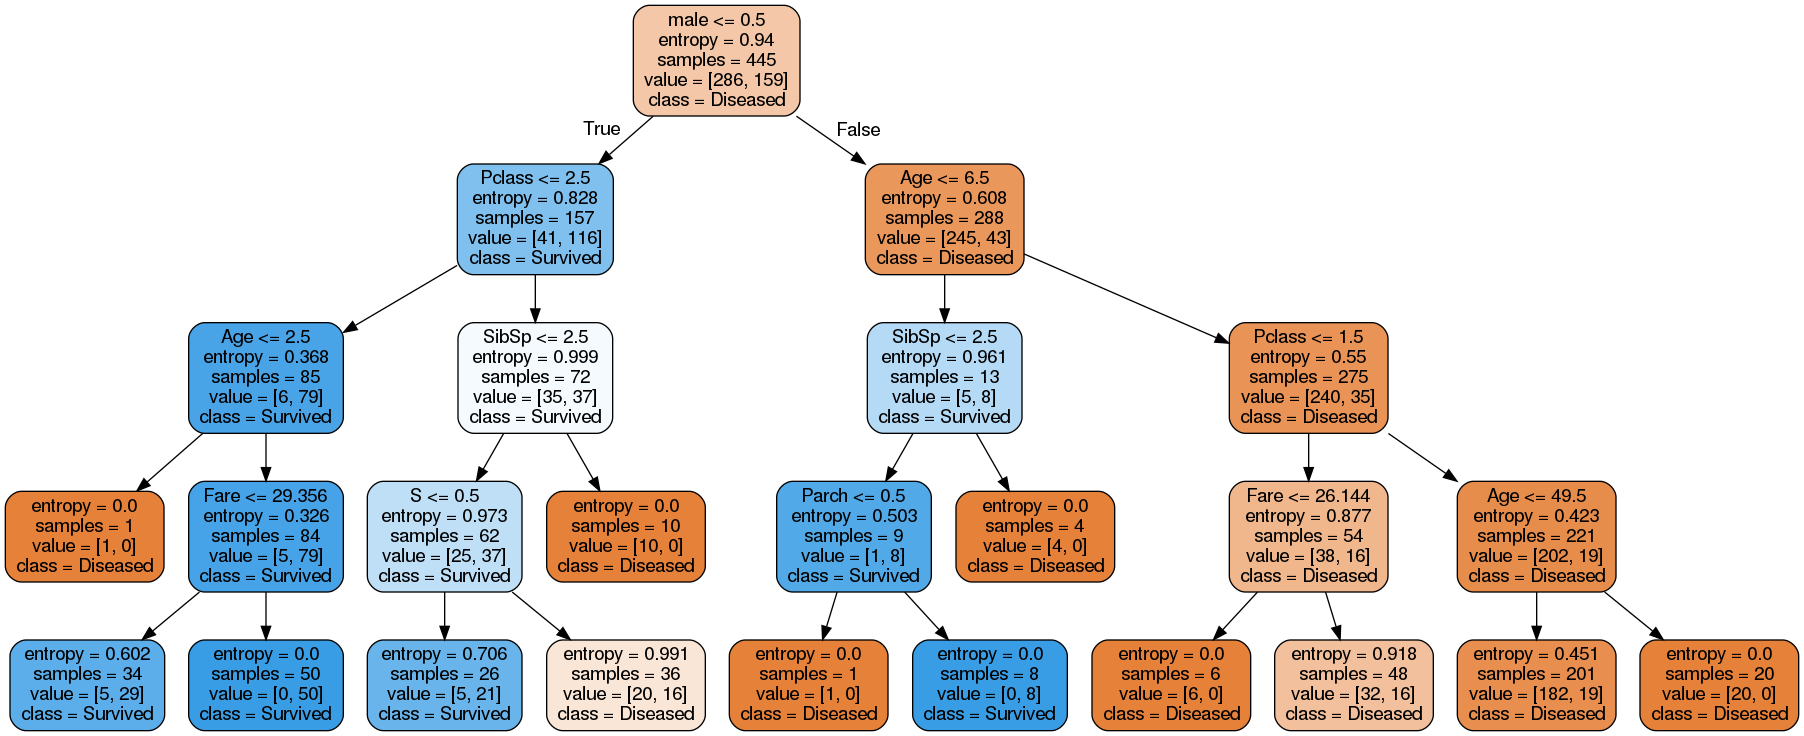

In [110]:
Image('titanicTreePostCV.png')